In [127]:
"""Prédire la Valeur fonciere du bien avec les critères suivants : type local, code postal,Nombre pieces principales et Surface reelle bati, montrer les résultats sur un graphique grâce à Plotly"""

'Prédire la Valeur fonciere du bien avec les critères suivants : type local, code postal,Nombre pieces principales et Surface reelle bati, montrer les résultats sur un graphique grâce à Plotly'

In [334]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import data_loader

In [357]:
df_paris = data_loader.load_house_attributes('https://www.data.gouv.fr/fr/datasets/r/90a98de0-f562-4328-aa16-fe0dd1dca60f')

In [358]:
df_paris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31173 entries, 2405430 to 2459559
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Valeur fonciere            31173 non-null  float64
 1   Code postal                31173 non-null  object 
 2   Commune                    31173 non-null  object 
 3   Type local                 31173 non-null  object 
 4   Surface reelle bati        31173 non-null  float64
 5   Nombre pieces principales  31173 non-null  int32  
dtypes: float64(2), int32(1), object(3)
memory usage: 1.5+ MB


In [339]:
df_paris.describe()

,Valeur fonciere,Surface reelle bati,Nombre pieces principales
count,3.117300e+04,31173.000000,31173.000000
mean,1.060010e+06,54.371700,2.447856
std,2.410530e+06,40.991417,1.308018
min,1.500000e-01,10.000000,1.000000
25%,2.906000e+05,28.000000,1.000000
50%,4.850000e+05,43.000000,2.000000
75%,8.490000e+05,68.000000,3.000000
max,2.774356e+07,500.000000,17.000000


In [340]:
df_paris['Code postal'].value_counts()

75018.0    3331
75015.0    3007
75016.0    2726
75017.0    2699
75011.0    2418
75020.0    2014
75019.0    1719
75010.0    1715
75012.0    1652
75014.0    1624
75013.0    1342
75009.0    1273
75007.0     921
75005.0     825
75006.0     812
75008.0     810
75003.0     788
75004.0     566
75002.0     565
75001.0     366
Name: Code postal, dtype: int64

In [341]:
df_paris['Type local'].value_counts()

Appartement    31003
Maison           170
Name: Type local, dtype: int64

<Figure size 720x720 with 0 Axes>

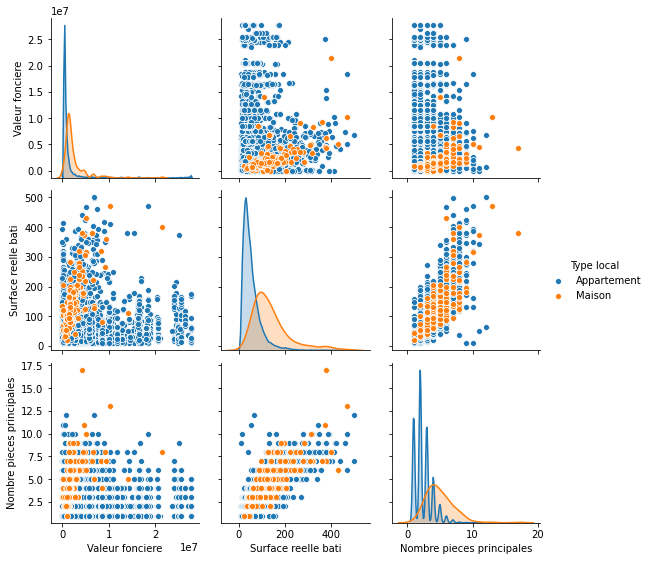

In [284]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.pairplot(df_paris[['Valeur fonciere','Surface reelle bati','Nombre pieces principales','Type local']], hue='Type local')

In [285]:
from sklearn.model_selection import train_test_split

In [286]:
train, test = train_test_split(df_paris, test_size=0.25, random_state=42)

In [287]:
print('Training Shape:', train.shape)
print('Testing Shape:', test.shape)

Training Shape: (23379, 6)
Testing Shape: (7794, 6)


In [288]:
from processing_attributes import process_house_attributes

In [289]:
train_x, test_x = process_house_attributes(df_paris, train, test)

In [290]:
train_y = train["Valeur fonciere"] 
test_y = test["Valeur fonciere"] 

In [291]:
from regr import regression

In [292]:
regr = regression(train_x, train_y)

In [294]:
for name, feature in zip(['Nombre pieces principales','Surface reelle bati', 'Code postal', 'Type local'], regr.feature_importances_):
    print(name, round(feature*100,1))

Nombre pieces principales 0.2
Surface reelle bati 34.7
Code postal 59.8
Type local 5.3


In [295]:
"""Les critères les plus importants pour prédire la valeur d'un bien à Paris sont l'arrondissement et la surface"""

"Les critères les plus importants pour prédire la valeur d'un bien à Paris sont l'arrondissement et la surface"

In [296]:
predictions = regr.predict(test_x)
errors = abs(predictions - test_y)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'euros.')

Mean Absolute Error: 828395.79 euros.


In [302]:
print("Quelle est la surface du bien ? ")
surface = input()
print("Quelle est le nombre de pièce du bien ? ")
piece = input()
print("Est-ce un Appartement ou une Maison ? ")
type_bien = input()
print("Entrer le code postal : ")
arrondissement = input()

Quelle est la surface du bien ? 


 65


Quelle est le nombre de pièce du bien ? 


 3


Est-ce un Appartement ou une Maison ? 


 Appartement


Entrer le code postal : 


 75017


In [303]:
attributes = {'Surface reelle bati':[surface],
        'Nombre pieces principales':[piece], 
             'Type local': [type_bien], 
             'Code postal': [arrondissement]}

In [311]:
df = pd.DataFrame(attributes)

In [312]:
from inputs import process_attributes

In [313]:
attr = process_attributes(df)

In [314]:
pred = regr.predict(attr)

In [324]:
votre_estimation = pred.tolist()
print("Voici votre estimation :", round(np.mean(votre_estimation), 2), "euros.")

Voici votre estimation : 1276681.02 euros.
